In [1]:
from qiskit import (
    QuantumCircuit,
    QuantumRegister,
    ClassicalRegister,
    AncillaRegister,
    IBMQ,
    Aer,
    __qiskit_version__,
)
from qiskit.circuit.library import QFT, GraphState, GroverOperator
from qiskit.qasm import pi
import numpy as np

from mqt.bench.utils.utils import *
from qiskit_nature.drivers import Molecule

from qiskit.algorithms import VQE
from qiskit.algorithms.optimizers import SLSQP
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit.circuit.library import RealAmplitudes, TwoLocal
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit.compiler import transpile

In [10]:
qp = get_examplary_max_cut_qp(3)
sim = QuantumInstance(
    backend=Aer.get_backend("qasm_simulator"), shots=1024, seed_simulator=123
)

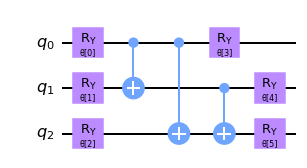

In [11]:
ansatz = TwoLocal(3, "ry", "cx", "full", reps=1)
# ansatz = RealAmplitudes(3, reps=2)
ansatz.decompose().draw(output="mpl", filename="flow_0")

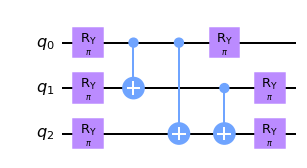

In [12]:
qc = ansatz.assign_parameters([np.pi, np.pi, np.pi, np.pi, np.pi, np.pi])
qc.decompose().draw(output="mpl", filename="flow_1")

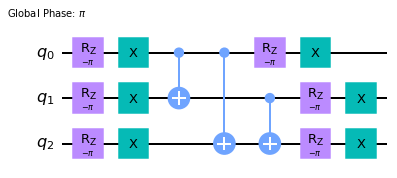

In [13]:
qc_2 = transpile(
    qc, basis_gates=["id", "rz", "sx", "x", "cx", "reset"], optimization_level=1
)
qc_2.draw(output="mpl", filename="flow_2")

In [17]:
c_map = select_c_map("ibm", True, 3)
qc_3 = get_compiled_circuit(qc, opt_level=1, c_map=c_map)
qc_3.draw(output="mpl", filename="flow_3")

NameError: name 'get_compiled_circuit' is not defined

In [1]:
from mqt.bench import get_one_benchmark

In [4]:
qc = get_one_benchmark("groundstate", 0, benchmark_instance_name="small")

In [2]:
qc = get_one_benchmark("tsp", 0, 2)

In [5]:
qc.draw()

»
    q_0: »
         »
    q_1: »
         »
    q_2: »
         »
    q_3: »
         »
    q_4: »
         »
    q_5: »
         »
    q_6: »
         »
    q_7: »
         »
    q_8: »
         »
    q_9: »
         »
   q_10: »
         »
   q_11: »
         »
meas: 12/»
         »
«         ┌────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐»
«    q_0: ┤0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               ├»
«         │                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                │»
«    q_1: ┤1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               ├»
«         │                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                │»
«    q_2: ┤2                                                                                                                                                                                                                                                                                                                                                                                                                                              